<a href="https://colab.research.google.com/github/arnaldocaetanocardoso/optimization_code/blob/main/quast%C3%A3o2_2_2_lista4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/rcpsilva/BCC342_Intro_to_Optimization
import sys
sys.path.append('/content/BCC342_Intro_to_Optimization/')

import line_search as ls
import numpy as np
import matplotlib.pyplot as plt
from fmin import gradient_descent

#f = lambda x : x[0]**2 + x[1]**2 + x[0]*x[1]
#grad = lambda x : np.array([2*x[0] + x[1],2*x[1] + x[0]]) 
#H = lambda x: np.array([[2, 1],
                        #[1, 2]])

f = lambda x: (100*(x[1] - x[0]**2)**2 + (x[0]-1)**2) 
grad = lambda x: np.array([-400*(x[1]-x[0]**2)*x[0] + 2*(x[0]-1), 200*(x[1]-x[0]**2)])
H = lambda x: np.array([[-400*x[1]+1200*x[0]**2,-400*x[0]],[-400*x[0],200]])


delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z = np.ndarray((len(X),len(X[0])))

for i in range(len(X)):
    for j in range(len(X[0])):
        Z[i][j] = f([X[i][j],Y[i][j]])

fatal: destination path 'BCC342_Intro_to_Optimization' already exists and is not an empty directory.


In [2]:
def perform_line_search(x,f,s,line_search,tol):
    f_aux = lambda a : f(x + a*s)
    bracket = ls.bracket(0,f_aux)
    alpha = line_search(f_aux,bracket[0],bracket[1],tol=tol)
    return alpha
def powell(x,f,tol=1e-6,line_search=ls.quadratic_fit_search):

    lx = [x]
    lfx = [f(x)]
    directions = []

    for i in range(len(x)):
        directions.append(np.zeros(len(x)))
        directions[i][i] = 1

    s = directions[-1]
    alpha = perform_line_search(x,f,s,line_search,tol)
    x = x + alpha*s

    lx.append(x)
    lfx.append(f(x))

    while np.linalg.norm(s) > tol:

        z = x
        i = 0

        while i < len(x) and np.linalg.norm(s) > tol:
            
            s = directions[i]
            alpha = perform_line_search(x,f,s,line_search,tol)
            x = x + alpha*directions[i]

            lx.append(x)
            lfx.append(f(x))

            i = i+1

        s = x - z
        alpha = perform_line_search(x,f,s,line_search,tol)
        x = x + alpha*s

        lx.append(x)
        lfx.append(f(x))

        directions.pop(0)
        directions.append(s)

    return x,f(x),lx,lfx

In [3]:
x,fx,lx,lfx = powell(np.array([-1.5,-1]),f,tol=1e-6)

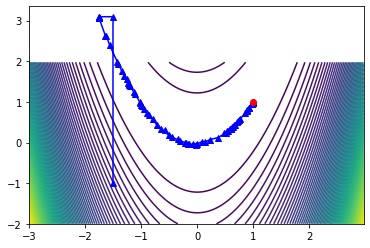

In [4]:
x0 = [x[0] for x in lx]
x1 = [x[1] for x in lx]

fig, ax = plt.subplots()
ax.contour(X, Y, Z, 100)
ax.plot(x0,x1,'^b-')
ax.plot(x[0],x[1],'or')

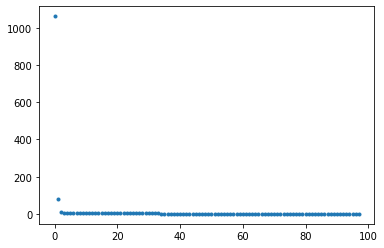

In [5]:
plt.plot(lfx,'.')